In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import random

### ResNet 34

In [9]:
from fastai.vision.all import ImageDataLoaders, Resize, aug_transforms, Normalize, imagenet_stats

dls = ImageDataLoaders.from_folder('deepfake dataset',valid_pct=0.2,item_tfms=Resize(360),
                                   batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])

In [ ]:
import torch
from fastai.vision.all import  accuracy, Learner, vision_learner

device = torch.device('mps')
learn = vision_learner(dls,'resnet34',metrics = accuracy)
learn.model = learn.model.to(device)

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10,lr_max = 9e-3,wd = 0.01)

90% acc @ 10 epochs -> No sign of stopping

In [ ]:
learn.export('resnet_34.pkl')

### ViT Training

In [3]:
from fastai.vision.all import ImageDataLoaders, Resize, aug_transforms, Normalize, imagenet_stats

dls = ImageDataLoaders.from_folder('deepfake dataset',valid_pct=0.2,item_tfms=Resize(360),
                                   batch_tfms=[*aug_transforms(size=224),Normalize.from_stats(*imagenet_stats)])

In [4]:
from fastai.vision.all import create_timm_model

model = create_timm_model('vit_small_patch16_224', pretrained=True, n_out=dls.c)

In [5]:
import torch
from fastai.vision.all import  accuracy, Learner, Learner

device = torch.device('mps')
learn = Learner(dls,model[0],metrics = accuracy)
learn.model = learn.model.to(device)

SuggestedLRs(valley=0.00013182566908653826)

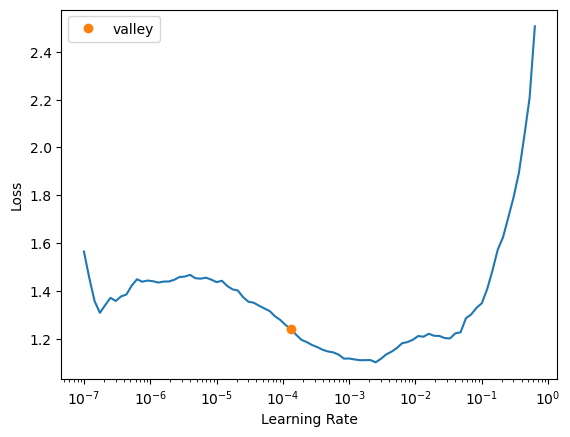

In [11]:
learn.lr_find()

91% acc @ 8 epochs. Best ACC 94.5 @ 7 epochs

In [5]:
learn.fit(4,1.3e-4,wd=0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.182957,0.160598,0.930178,02:12
1,0.152520,0.245326,0.893328,02:37
2,0.155659,0.138130,0.945694,03:13
3,0.142293,0.221633,0.910396,02:52


In [7]:
learn.export('vit_small.pkl')

0 = fake,1 = real